# Series de tiempo

<p style='text-align: justify;'>Usaremos las series de tiempo para predecir el cierre de una acción en la bolsa de valores mexicana.
Podemos pensar en las series de tiempo como secuencias de datos que miden la misma cosa sobre un periodo de tiempo, podemos imaginarlo como un conjunto de datos que tiene una fecha y/o hora en la cual cada registro fue creado.
Este tipo de conjunto de datos crece constantemente, tenemos bolsas de valores que están constantemente registrando los costos, existen casas inteligentes que crean series de tiempo con la temperatura del hogar, energía entre otras medidas.</p>

<p style='text-align: justify;'>Por lo general, en las series de tiempo cada que un dato nuevo se genera, este se anexa a la serie existente. Los datos ya guardados no pueden ser modificados pues es un evento en el pasado. Además, los datos llegan ordenados por el tiempo asociado a cada registro. Podrás imaginar que el tiempo es el eje principal para este tipo de conjunto de datos.</p>

<p style='text-align: justify;'>Poder medir los sistemas presentes y guardar esa información en series de tiempo nos permite analizar el pasado, monitorear el presente y predecir el futuro.</p>

Cualquier serie de tiempo se puede describir en 4 componentes básicos:
- Nivel. El valor de referencia para la serie si fuera una línea recta.
- Tendencia. El aumento o disminución de la serie a lo largo del tiempo.
- Estacionalidad. Los patrones o ciclos a lo largo del tiempo.
- Ruido. La variabilidad en las observaciones.

Como realizar predicciones:
- Métodos Clásicos (ARIMA)
- Métodos de Machine Learning

# Series de tiempo en la bolsa de valores

https://finance.yahoo.com/quote/CEMEXCPO.MX

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
df = pd.read_csv("./data/finance/CEMEXCPO.MX.csv",index_col=0, parse_dates=['Date'])

In [2]:
# %matplotlib notebook
%matplotlib inline

In [3]:
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2000-01-03,8.97564,9.09396,8.70519,8.78970,1.790444,8140435.0
2000-01-04,8.45164,8.48544,8.18118,8.18118,1.666490,24190581.0
2000-01-05,8.18964,8.28260,8.01215,8.21499,1.673377,36945507.0
2000-01-06,8.23189,8.29106,7.99525,8.07976,1.645831,13890801.0
2000-01-07,8.11357,8.16428,8.04596,8.16428,1.663048,43027169.0


In [4]:
df.dtypes

Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume       float64
dtype: object

In [5]:
df = pd.read_csv("./data/finance/CEMEXCPO.MX.csv",index_col=0,parse_dates=['Date'])

In [6]:
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2000-01-03,8.97564,9.09396,8.70519,8.78970,1.790444,8140435.0
2000-01-04,8.45164,8.48544,8.18118,8.18118,1.666490,24190581.0
2000-01-05,8.18964,8.28260,8.01215,8.21499,1.673377,36945507.0
2000-01-06,8.23189,8.29106,7.99525,8.07976,1.645831,13890801.0
2000-01-07,8.11357,8.16428,8.04596,8.16428,1.663048,43027169.0


In [7]:
df.astype(np.float32)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2000-01-03,8.97564,9.09396,8.70519,8.78970,1.790444,8140435.0
2000-01-04,8.45164,8.48544,8.18118,8.18118,1.666490,24190580.0
2000-01-05,8.18964,8.28260,8.01215,8.21499,1.673377,36945508.0
2000-01-06,8.23189,8.29106,7.99525,8.07976,1.645831,13890801.0
2000-01-07,8.11357,8.16428,8.04596,8.16428,1.663048,43027168.0
...,...,...,...,...,...,...
2019-09-02,7.49000,7.50000,7.28000,7.37000,7.370000,9461876.0
2019-09-03,7.39000,7.49000,7.05000,7.08000,7.080000,49081868.0
2019-09-04,7.15000,7.40000,7.15000,7.39000,7.390000,49492324.0


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5010 entries, 2000-01-03 to 2019-09-06
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       4957 non-null   float64
 1   High       4957 non-null   float64
 2   Low        4957 non-null   float64
 3   Close      4957 non-null   float64
 4   Adj Close  4957 non-null   float64
 5   Volume     4957 non-null   float64
dtypes: float64(6)
memory usage: 274.0 KB


In [9]:
df.head(10)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2000-01-03,8.97564,9.09396,8.70519,8.78970,1.790444,8140435.0
2000-01-04,8.45164,8.48544,8.18118,8.18118,1.666490,24190581.0
2000-01-05,8.18964,8.28260,8.01215,8.21499,1.673377,36945507.0
2000-01-06,8.23189,8.29106,7.99525,8.07976,1.645831,13890801.0
2000-01-07,8.11357,8.16428,8.04596,8.16428,1.663048,43027169.0
2000-01-10,8.28260,8.36712,8.11357,8.33331,1.697479,18132583.0
2000-01-11,8.26570,8.35022,8.11357,8.13893,1.657884,22208716.0
2000-01-12,8.11357,8.16428,8.02905,8.12202,1.654439,10199208.0
2000-01-13,8.24880,8.34177,8.07131,8.18118,1.666490,14801867.0


In [10]:
# df.set_index('Date').asfreq('d')
# df.head(10)

In [11]:
df = df.fillna(method="ffill")
df.head(10)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2000-01-03,8.97564,9.09396,8.70519,8.78970,1.790444,8140435.0
2000-01-04,8.45164,8.48544,8.18118,8.18118,1.666490,24190581.0
2000-01-05,8.18964,8.28260,8.01215,8.21499,1.673377,36945507.0
2000-01-06,8.23189,8.29106,7.99525,8.07976,1.645831,13890801.0
2000-01-07,8.11357,8.16428,8.04596,8.16428,1.663048,43027169.0
2000-01-10,8.28260,8.36712,8.11357,8.33331,1.697479,18132583.0
2000-01-11,8.26570,8.35022,8.11357,8.13893,1.657884,22208716.0
2000-01-12,8.11357,8.16428,8.02905,8.12202,1.654439,10199208.0
2000-01-13,8.24880,8.34177,8.07131,8.18118,1.666490,14801867.0


In [12]:
df = df["2016-06":"2018-06"]

In [13]:
# Por un error actual en matplotlib ##########
import pandas.plotting._converter as pandacnv#
pandacnv.register()###########################
##############################################
plt.figure(figsize=(9,5))
plt.plot(df.Close);

ModuleNotFoundError: No module named 'pandas.plotting._converter'

# Haciendo predicciones a futuro
Supongamos que queremos hacer una predicción del día de mañana (actual valor a predecir). Si solo tenemos la fecha como referencia difícilmente podremos dar un pronóstico acertado pues nos falta conocer cómo se ha comportado hasta el momento la serie. Es ahí donde utilizamos ventanas deslizantes de tiempo o simplemente ventanas de tiempo, estas nos permiten crear variables artificiales las cuales nos describen el comportamiento de los días anteriores.

Esto a su ves nos permite resolver el problema de prediccion con aprendizaje supervisado donde las variables X (descripciones de la ventana) nos permite predecir una variable Y (el valor actual de cierre).
<center><img src="img/ts.png" width = "60%"></center>

In [14]:
import seaborn as sns
import numpy as np
test_size = 60
window_size = 3

In [15]:
df_shift = df.Close.shift(1)
df_mean_roll = df_shift.rolling(window_size).mean()
df_std_roll = df_shift.rolling(window_size).std()
df_mean_roll.name = "mean_roll"
df_std_roll.name = "std_roll"
df_mean_roll.index = df.index
df_std_roll.index = df.index

In [16]:
df_shift.head(),df_mean_roll.head(),df_std_roll.head()

(Date
 2016-06-01        NaN
 2016-06-02    11.2308
 2016-06-03    11.1250
 2016-06-06    11.4135
 2016-06-07    11.3654
 Name: Close, dtype: float64,
 Date
 2016-06-01          NaN
 2016-06-02          NaN
 2016-06-03          NaN
 2016-06-06    11.256433
 2016-06-07    11.301300
 Name: mean_roll, dtype: float64,
 Date
 2016-06-01         NaN
 2016-06-02         NaN
 2016-06-03         NaN
 2016-06-06    0.145948
 2016-06-07    0.154563
 Name: std_roll, dtype: float64)

In [17]:
df_w = pd.concat([df.Close,df_mean_roll,df_std_roll],axis=1)
df_w.head(10)

,Close,mean_roll,std_roll
Date,,,
2016-06-01,11.2308,NaN,NaN
2016-06-02,11.1250,NaN,NaN
2016-06-03,11.4135,NaN,NaN
2016-06-06,11.3654,11.256433,0.145948
2016-06-07,11.5962,11.301300,0.154563
2016-06-08,11.9423,11.458367,0.121766
2016-06-09,11.5769,11.634633,0.290364
2016-06-10,11.2596,11.705133,0.205619
2016-06-13,11.1250,11.592933,0.341632


In [18]:
df_w = df_w[window_size:]
df_w.head()

,Close,mean_roll,std_roll
Date,,,
2016-06-06,11.3654,11.256433,0.145948
2016-06-07,11.5962,11.301300,0.154563
2016-06-08,11.9423,11.458367,0.121766
2016-06-09,11.5769,11.634633,0.290364
2016-06-10,11.2596,11.705133,0.205619


In [19]:
test = df_w[-test_size:]
train = df_w[:-test_size]
X_test = test.drop("Close",axis = 1)
y_test = test["Close"]
X_train = train.drop("Close",axis = 1)
y_train = train["Close"]

In [20]:
from sklearn.svm import SVR
clf = SVR(gamma="scale")
clf.fit(X_train, y_train)
y_train_hat = pd.Series(clf.predict(X_train),index=y_train.index)
y_test_hat = pd.Series(clf.predict(X_test),index=y_test.index)

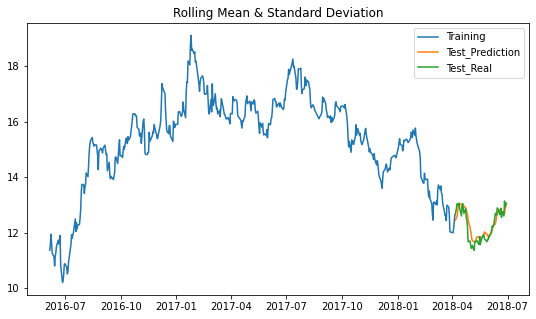

In [21]:
plt.figure(figsize=(9,5))
plt.plot(y_train ,label='Training')
plt.plot(y_test_hat,label='Test_Prediction')
plt.plot(y_test , label='Test_Real')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation');

In [22]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_test_hat)
print('MSE: {}'.format(mse))

MSE: 0.059138510623703656
